<h1 align="center" style="margin-top:10px">Simple Analysis of the Current State of the Australian Labour Market</h1>
<h2 align="center" style="margin-top:20px">(Tech Sector)</h2>

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

## 1. Load Data

Raw data were retrieved from https://lmip.gov.au/default.aspx?LMIP/Downloads/EmploymentRegion and have been slightly modified before uploading to Jupyter Notebook. Both cross-sectional and time series data are considered. The analysis of the current state of the Australian labour market focuses on tech employment geographical and demographic information. The trend analysis focuses on the period over last five years.

In [2]:
data = pd.read_csv("ER Employment Tech Industry - November 2021.csv")
data.head()

,Employment Region,State/Territory,Employment - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth,Employment Distribution (%)
0,Capital Region,NSW/ACT,"39,800","32,200","7,600","22,600","17,200","8,100",11.7
1,Central West,NSW,"5,600","4,200","1,500","2,400","3,200",700,4.9
2,Far West Orana,NSW,0,0,0,0,0,-700,0.0
3,Hunter,NSW,"23,700","17,100","6,600","14,000","9,700","5,000",7.2
4,Illawarra South Coast,NSW,"16,500","12,500","4,000","8,000","8,500","4,500",7.2


In [3]:
data_timeseries = pd.read_csv("ER Employment Tech Industry Time Series - November 2021.csv")
data_timeseries.head()

,Employment Region,State/Territory,Nov-21,Nov-20,Nov-16
0,Capital Region,NSW/ACT,"39,800","35,200","31,700"
1,Central West,NSW,"5,600","3,900","4,900"
2,Far West Orana,NSW,0,"2,400",700
3,Hunter,NSW,"23,700","23,200","18,700"
4,Illawarra South Coast,NSW,"16,500","17,500","12,000"


## 2. Basic Check

In [4]:
#check non-null count and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Employment Region            45 non-null     object 
 1   State/Territory              45 non-null     object 
 2   Employment  - Total          45 non-null     object 
 3   Employed Full-Time           45 non-null     object 
 4   Employed Part-Time           45 non-null     object 
 5   Employed - Male              45 non-null     object 
 6   Employed - Female            45 non-null     object 
 7   Five year growth             45 non-null     object 
 8   Employment Distribution (%)  45 non-null     float64
dtypes: float64(1), object(8)
memory usage: 3.3+ KB


In [5]:
#check unique data of each column
data.nunique()

Employment Region              45
State/Territory                 8
Employment  - Total            43
Employed Full-Time             41
Employed Part-Time             37
Employed - Male                38
Employed - Female              38
Five year growth               40
Employment Distribution (%)    40
dtype: int64

In [6]:
#check missing values
data.isnull().sum().sort_values(ascending=False)/len(data)

Employment Region              0.0
State/Territory                0.0
Employment  - Total            0.0
Employed Full-Time             0.0
Employed Part-Time             0.0
Employed - Male                0.0
Employed - Female              0.0
Five year growth               0.0
Employment Distribution (%)    0.0
dtype: float64

## 3. Exploratory Data Analysis (EDA)

### 3.1 Nongraphical Univariate

In [7]:
#convert data from object to int64
object_to_int64 = ["Employment  - Total", "Employed Full-Time", "Employed Part-Time", 
                   "Employed - Male", "Employed - Female", "Five year growth"]

for i in object_to_int64:
    data[i] = data[i].str.replace(',', '')
    data[i] = data[i].astype(str).astype(int)

In [8]:
#descriptive statistics
from scipy.stats import skew
from scipy.stats import kurtosis

descriptive = data.describe()
descriptive.loc['skewness', :] = data.skew()
descriptive.loc['kurtosis', :] = data.kurt()
descriptive.iloc[:,:7].round(4)

,Employment - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth,Employment Distribution (%)
count,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000
mean,26755.5556,21017.7778,5728.8889,14877.7778,11877.7778,4460.0000,6.8378
std,37447.1237,30164.6790,7370.1370,20780.1467,16774.1669,7668.5130,3.5632
min,0.0000,0.0000,0.0000,0.0000,0.0000,-6300.0000,0.0000
25%,4700.0000,3100.0000,1400.0000,2400.0000,2400.0000,-100.0000,4.4000
50%,9700.0000,7000.0000,2600.0000,5300.0000,4600.0000,2000.0000,6.1000
75%,36900.0000,29400.0000,7600.0000,22500.0000,15600.0000,5000.0000,8.8000
max,165000.0000,132700.0000,32300.0000,88100.0000,78200.0000,29800.0000,17.4000
skewness,2.5136,2.5008,2.5008,2.3502,2.7123,1.8636,1.1139
kurtosis,6.6046,6.5006,6.6502,5.7290,7.7442,3.7204,1.7072


### 3.2 Graphical Univariate

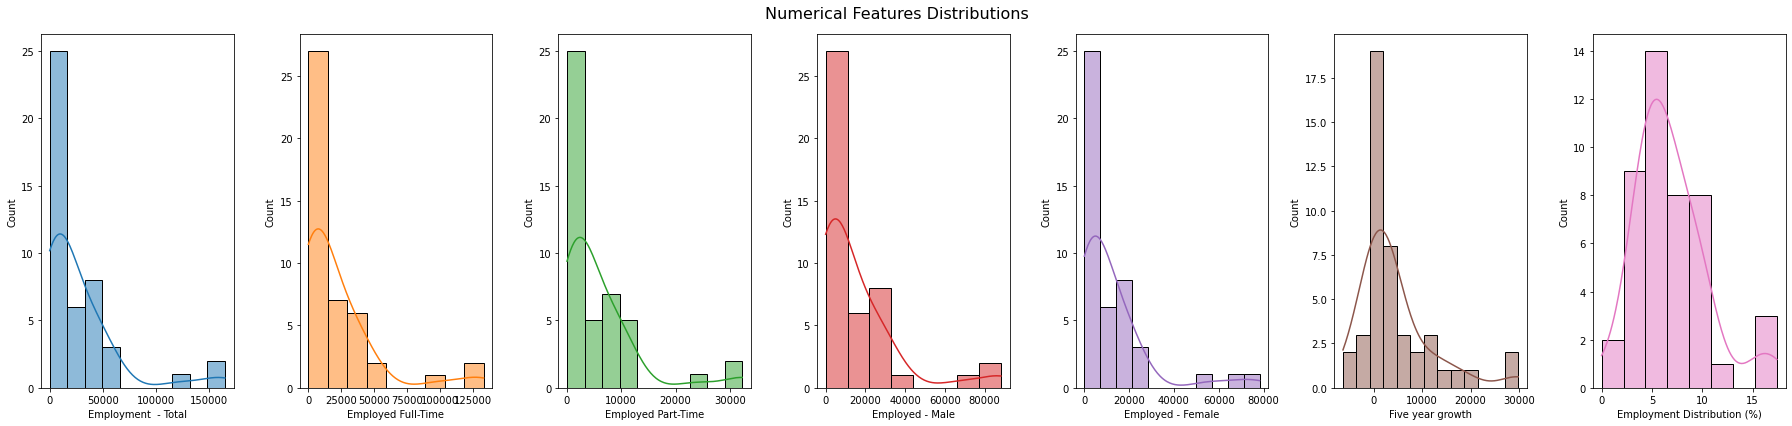

In [9]:
#plot numerical features distributions
employment_features = ["Employment  - Total", "Employed Full-Time", "Employed Part-Time", 
                       "Employed - Male", "Employed - Female", "Five year growth", "Employment Distribution (%)"]

fig, ax = plt.subplots(1, len(employment_features), figsize=(25,6))
colors = plt.rcParams['axes.prop_cycle']()

for i, employment_feature in enumerate(data[employment_features]):
    sns.histplot(data=data, x=employment_feature, kde=True, ax=ax[i], **next(colors))
fig.suptitle("Numerical Features Distributions", fontsize=16)
plt.tight_layout()
fig.show()

### 3.3 Nongraphical Multivariate

In [10]:
#total employment by state or territory
total_employment = data[["State/Territory", "Employment  - Total"]]
total_employment.groupby(["State/Territory"]).sum()

,Employment - Total
State/Territory,
NSW,428000
NSW/ACT,39800
NT,5100
QLD,202200
SA,66100
TAS,15800
VIC,345200
WA,101800


In [11]:
#employment type: full-time vs part-time by state or territory
data_employmenttype = data[["State/Territory", "Employed Full-Time", "Employed Part-Time"]]
data_employmenttype.groupby(["State/Territory"]).sum()

,Employed Full-Time,Employed Part-Time
State/Territory,,
NSW,342700,85400
NSW/ACT,32200,7600
NT,4200,900
QLD,158100,43900
SA,50400,15700
TAS,11300,4400
VIC,271000,74100
WA,75900,25800


In [12]:
#gender: male vs female by state or territory
data_gender = data[["State/Territory", "Employed - Male", "Employed - Female"]]
data_gender.groupby(["State/Territory"]).sum()

,Employed - Male,Employed - Female
State/Territory,,
NSW,234800,193000
NSW/ACT,22600,17200
NT,2700,2400
QLD,108700,93500
SA,38300,27800
TAS,8800,7000
VIC,193200,152200
WA,60400,41400


In [13]:
#five-year growth by state or territory
employment_growth = data[["State/Territory", "Five year growth"]]
employment_growth.groupby(["State/Territory"]).sum()

,Five year growth
State/Territory,
NSW,70800
NSW/ACT,8100
NT,-500
QLD,25300
SA,11600
TAS,4400
VIC,74900
WA,6100


In [14]:
#employment distribution by state or territory
employment_distribution = data[["State/Territory", "Employment Distribution (%)"]]
employment_distribution.groupby(["State/Territory"]).sum()

,Employment Distribution (%)
State/Territory,
NSW,77.2
NSW/ACT,11.7
NT,6.2
QLD,66.1
SA,24.5
TAS,12.0
VIC,84.1
WA,25.9


### 3.4 Graphical Multivariate

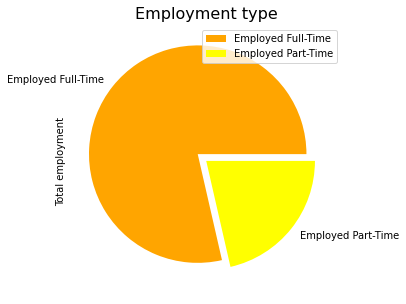

In [15]:
#total employment by employment type
employmenttype_total = data_employmenttype.groupby(["State/Territory"]).sum().sum()
employmenttype_total = pd.DataFrame(employmenttype_total).set_axis(["Total employment"], axis=1, inplace=False)
explode = (0.1, 0)
plot = employmenttype_total.plot.pie(y="Total employment", explode=explode, colors = ["orange", "yellow"], figsize=(5, 5))
plt.title("Employment type", fontsize=16)
plt.show()

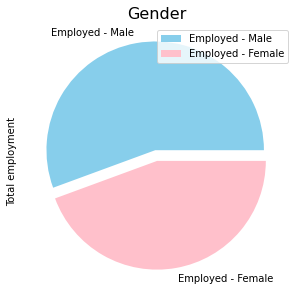

In [16]:
#total employment by gender
gender_total = data_gender.groupby(["State/Territory"]).sum().sum()
gender_total = pd.DataFrame(gender_total).set_axis(["Total employment"], axis=1, inplace=False)
explode = (0.1, 0)
plot = gender_total.plot.pie(y="Total employment", explode=explode, colors = ["skyblue", "pink"], figsize=(5, 5))
plt.title("Gender", fontsize=16)
plt.show()

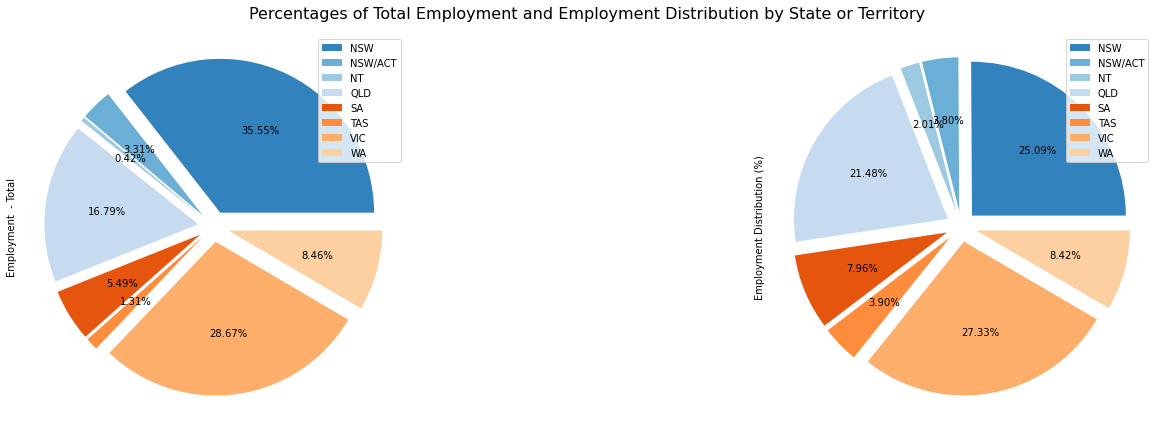

In [17]:
#total employment and employment distribution by state or territory
rest_features = ["State/Territory", "Employment  - Total", "Employment Distribution (%)"]

rest = data[rest_features]
rest = rest.groupby(["State/Territory"]).sum()

fig, ax = plt.subplots(1, len(rest_features[1:]), figsize=(25,6))
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(8))
for i, rest_feature in enumerate(rest[rest_features[1:]]):
    rest.plot(kind='pie', y=rest_feature, ax=ax[i], explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), labels=None, colors=colors, autopct='%1.2f%%')

fig.suptitle("Percentages of Total Employment and Employment Distribution by State or Territory", fontsize=16)
plt.tight_layout()
fig.show()

Given all the nongraphical and graphical exploratory data analysis above, it is evident to find that (1) the number of employed full-time positions are far greater than that of employed part-time counterparts; (2) the number of male employees is slightly greater than female; (3)in terms of total employment quantities and censored employment distribution, New South Wales and Victoria shared the largest cake in Australian tech industry (Nov-2021).

## 4. Feature Engineering

In [18]:
#now focus time series data
data_timeseries = pd.read_csv("ER Employment Tech Industry Time Series - November 2021.csv")
data_timeseries.head()

,Employment Region,State/Territory,Nov-21,Nov-20,Nov-16
0,Capital Region,NSW/ACT,"39,800","35,200","31,700"
1,Central West,NSW,"5,600","3,900","4,900"
2,Far West Orana,NSW,0,"2,400",700
3,Hunter,NSW,"23,700","23,200","18,700"
4,Illawarra South Coast,NSW,"16,500","17,500","12,000"


In [19]:
#basic check
data_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employment Region  46 non-null     object
 1   State/Territory    46 non-null     object
 2   Nov-21             46 non-null     object
 3   Nov-20             46 non-null     object
 4   Nov-16             46 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


In [20]:
#convert data from object to int64
object_to_int64 = ["Nov-21", "Nov-20", "Nov-16"]

for i in object_to_int64:
    data_timeseries[i] = data_timeseries[i].str.replace(',', '')
    data_timeseries[i] = data_timeseries[i].astype(str).astype(int)
data_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employment Region  46 non-null     object
 1   State/Territory    46 non-null     object
 2   Nov-21             46 non-null     int64 
 3   Nov-20             46 non-null     int64 
 4   Nov-16             46 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ KB


In [21]:
trend_data = data_timeseries[["State/Territory", "Nov-16", "Nov-20", "Nov-21"]]
trend_data = trend_data.groupby(["State/Territory"]).sum()
trend_data

,Nov-16,Nov-20,Nov-21
State/Territory,,,
AUST,1017700,1182300,1226600
NSW,357200,398600,428000
NSW/ACT,31700,35200,39800
NT,5600,5500,5100
QLD,176900,188300,202200
SA,54500,57600,66100
TAS,11400,16200,15800
VIC,270300,322600,345200
WA,95700,103800,101800


In [22]:
#interpolate data between Nov-16 and Nov-20
trend_data["Nov-17"] = (trend_data["Nov-20"] - trend_data["Nov-16"])/4 + trend_data["Nov-16"]
trend_data["Nov-18"] = (trend_data["Nov-20"] - trend_data["Nov-16"])/4*2 + trend_data["Nov-16"]
trend_data["Nov-19"] = (trend_data["Nov-20"] - trend_data["Nov-16"])/4*3 + trend_data["Nov-16"]
trend_data = trend_data[["Nov-16", "Nov-17", "Nov-18", "Nov-19", "Nov-20", "Nov-21"]]
trend_data.head()

,Nov-16,Nov-17,Nov-18,Nov-19,Nov-20,Nov-21
State/Territory,,,,,,
AUST,1017700,1058850.0,1100000.0,1141150.0,1182300,1226600
NSW,357200,367550.0,377900.0,388250.0,398600,428000
NSW/ACT,31700,32575.0,33450.0,34325.0,35200,39800
NT,5600,5575.0,5550.0,5525.0,5500,5100
QLD,176900,179750.0,182600.0,185450.0,188300,202200


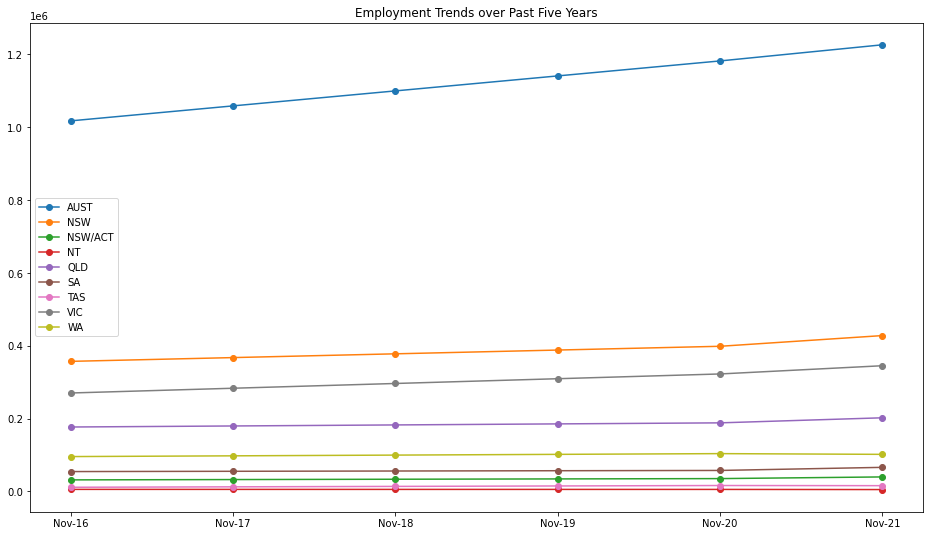

In [23]:
#plot trend data
plt.figure(figsize=(16,9))
plt.plot(trend_data.iloc[0], label=trend_data.index[0], marker='o')
plt.plot(trend_data.iloc[1], label=trend_data.index[1], marker='o')
plt.plot(trend_data.iloc[2], label=trend_data.index[2], marker='o')
plt.plot(trend_data.iloc[3], label=trend_data.index[3], marker='o')
plt.plot(trend_data.iloc[4], label=trend_data.index[4], marker='o')
plt.plot(trend_data.iloc[5], label=trend_data.index[5], marker='o')
plt.plot(trend_data.iloc[6], label=trend_data.index[6], marker='o')
plt.plot(trend_data.iloc[7], label=trend_data.index[7], marker='o')
plt.plot(trend_data.iloc[8], label=trend_data.index[8], marker='o')
plt.title("Employment Trends over Past Five Years")
plt.legend()
plt.show()

## 4. Model Building and Model Prediction

Given limited time series data, moving average or advanced time series predictive model has not been considered this time. Instead, simple linear regression will be used to provide a simple prediction result about the future of the Australian labour market that is relevant to the tech sector.

In [24]:
#simple linear regression on total employment
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5, 6]).reshape((-1, 1))
y = trend_data.iloc[0].values

model = LinearRegression()
model.fit(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.999844005477141
predicted response:
[1017100. 1058700. 1100300. 1141900. 1183500. 1225100.]


In [25]:
x_new = np.array([7]).reshape((-1, 1))
y_new = model.predict(x_new)
print("Nov-22 Prediction: ", y_new)

Nov-22 Prediction:  [1266700.]


By applying simple linear regression model, the prediction of total employment on November 2022 is 1266700.